# intro, testing

![mnist](https://raw.githubusercontent.com/nils-holmberg/sfac-py/main/fig/lecture-201116-aiml.png)

import packages

In [3]:
import numpy as np
#!pip install numpy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline


lets try it out

part 1 finished
part 2 finished
part 3 finished


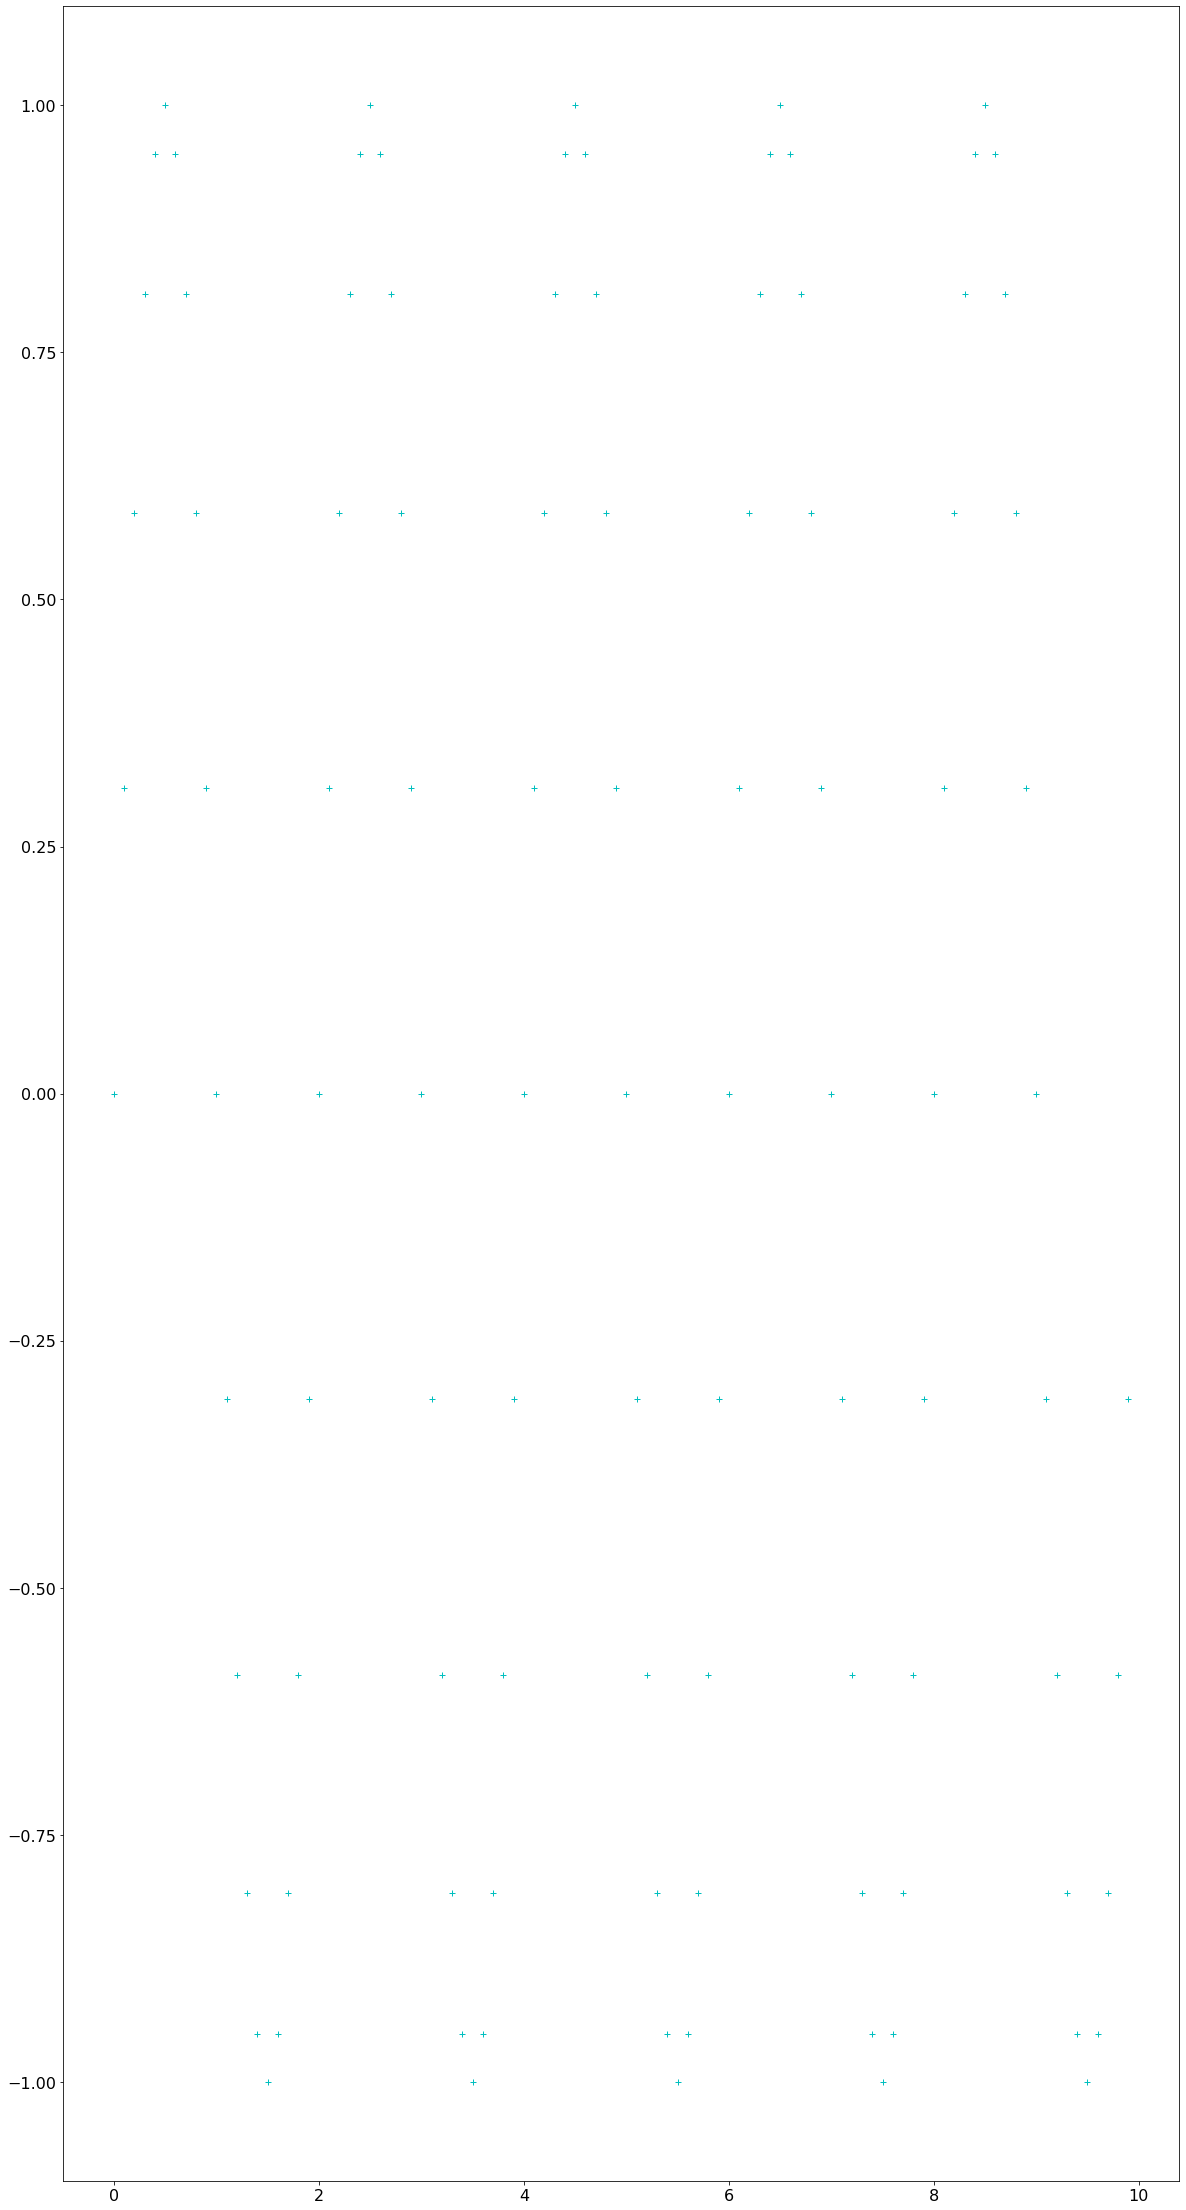

In [16]:
t = np.arange(.0, 10., .1)
print("part 1 finished")
s = np.sin(np.pi*t)
print("part 2 finished")
plt.plot(t, s, 'c+')
print("part 3 finished")
# save figure
plt.savefig("sin-curve.png")

In [5]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
#import tensorflow as tf; print(tf.__version__)

# data collection, preprocessing

60000 train samples
10000 test samples
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


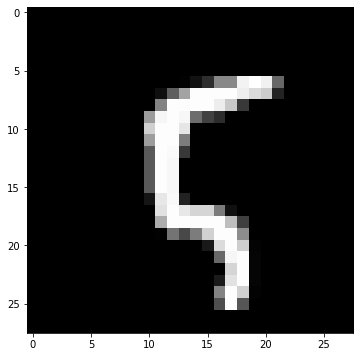

In [7]:
# load the MNIST dataset
(x_train, y_trainO), (x_test, y_testO) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_trainO, num_classes)
y_test = keras.utils.to_categorical(y_testO, num_classes)

# visualize data
plt.rcParams['figure.figsize'] = (6,6)
obs_idx = 100
plt.imshow(x_train[obs_idx], cmap='gray')
print(y_train[obs_idx])

# convert images into vectors of numbers
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize
x_train /= 255
x_test /= 255


# model specification, hyper parameters

In [8]:
# specify MLP model (multi-layer perceptron)
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 16,058
Trainable params: 16,058
Non-trainable params: 0
_________________________________________________________________


# train MLP model

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5379 - accuracy: 0.8402 - val_loss: 0.2699 - val_accuracy: 0.9236
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.9245 - val_loss: 0.2254 - val_accuracy: 0.9332
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2075 - accuracy: 0.9384 - val_loss: 0.1937 - val_accuracy: 0.9410
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1778 - accuracy: 0.9462 - val_loss: 0.1748 - val_accuracy: 0.9447
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1594 - accuracy: 0.9517 - val_loss: 0.1619 - val_accuracy: 0.9506
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1443 - accuracy: 0.9556 - val_loss: 0.1549 - val_accuracy: 0.9518
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1341 - accuracy: 0.9595 - val_loss: 0.1456 - val_accuracy: 0.9542
Epoch 

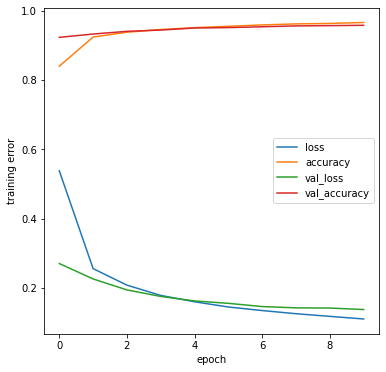

In [9]:
batch_size = 128
epochs = 10

# train the model (output training history)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# training diagnostics
plt.figure('Model training')
plt.ylabel('training error')
plt.xlabel('epoch')
for k in history.history.keys():
    plt.plot(history.history[k], label=k) 
plt.legend(loc='best')

# evaluate model on test data, generalization

In [10]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# make a prediction on the test set
#predicted_classes = model.predict_classes(x_test)
predicted_classes = np.argmax(model.predict(x_test), axis=-1)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_testO)[0]
incorrect_indices = np.nonzero(predicted_classes != y_testO)[0]
print()
print(len(correct_indices), "classified correctly")
print(len(incorrect_indices), "classified incorrectly")


Test loss: 0.1369607001543045
Test accuracy: 0.9584000110626221

9584 classified correctly
416 classified incorrectly


In [11]:
def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    """
    The function is used to construct the confusion matrix 
    """
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(10,10))
    plt.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,10):
        for j in range(0,10):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


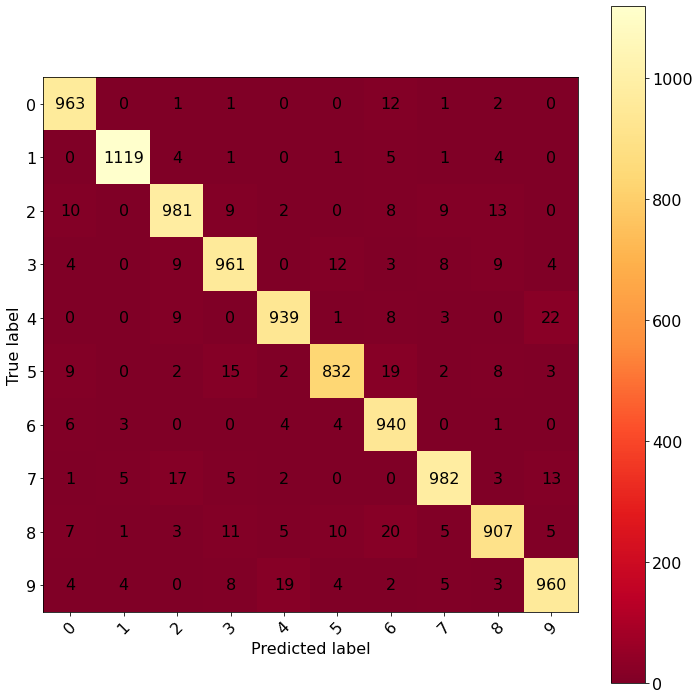

In [12]:
# visualize true and predicted labels
y_prob = model.predict(x_test, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_test]
labels = np.arange(0,10,1)
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlOrRd_r)



9584  classified correctly
416  classified incorrectly


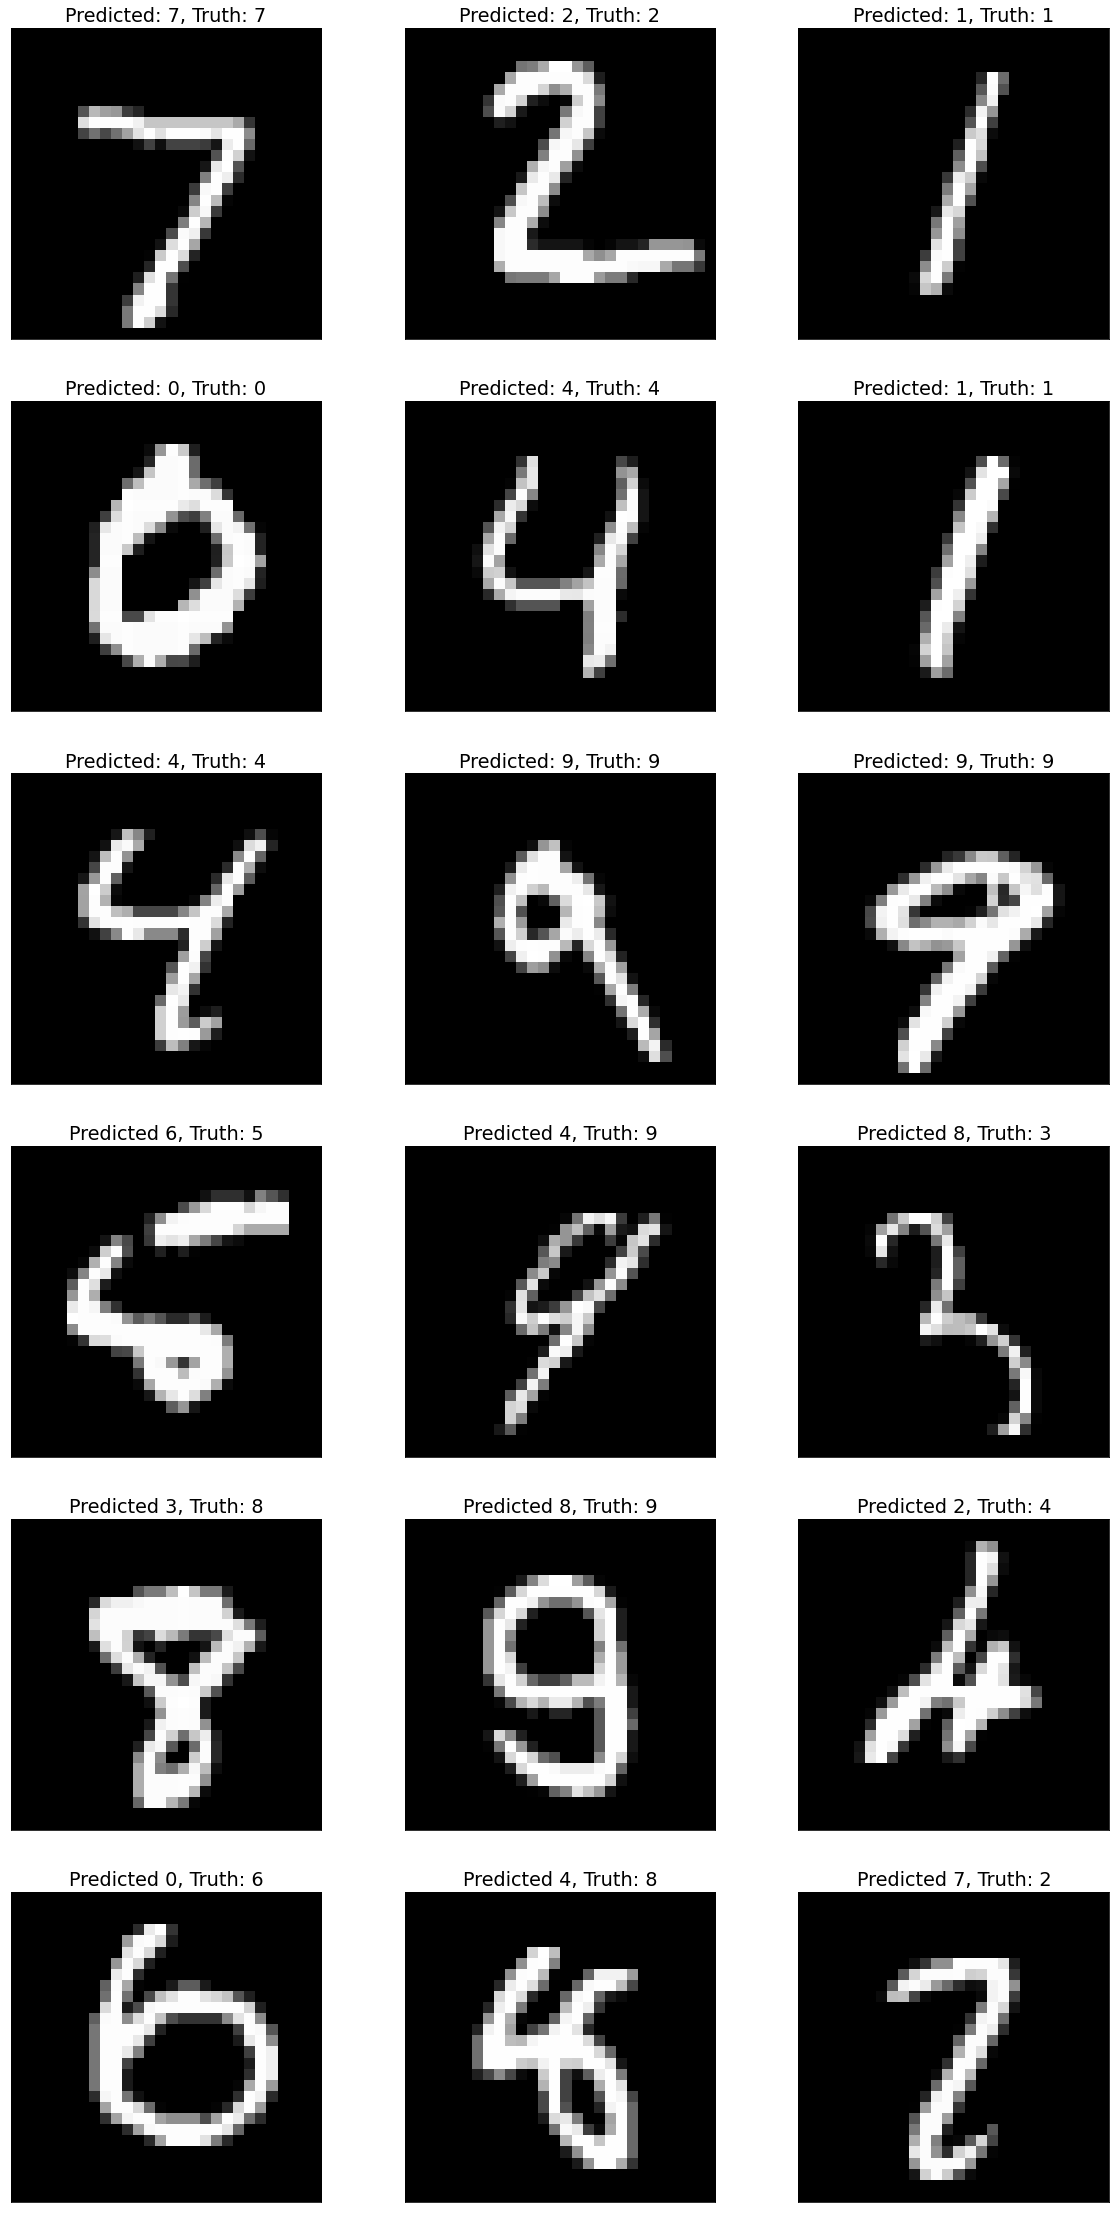

In [13]:
# Some visual feedback

# Make a prediction on the test set
predicted_classes = np.argmax(model.predict(x_test), axis=-1)

# See which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_testO)[0]
incorrect_indices = np.nonzero(predicted_classes != y_testO)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# Adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (20,40)

figure_evaluation = plt.figure()

# Plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_testO[correct]))
    plt.xticks([])
    plt.yticks([])

# Plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_testO[incorrect]))
    plt.xticks([])
    plt.yticks([])
